In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Customer_Data.csv')
df.shape

(1743, 6)

In [4]:
df.head()

,Customer Name,Age,Gender,Location,Choice of Beer,Prices
0,Customer 1,21,Female,Near Shop A,Budweiser Can (Pack of 6),600
1,Customer 2,21,Female,Near Shop A,Budweiser Can (Pack of 6),600
2,Customer 3,23,Male,Near Shop A,Budweiser Can (Pack of 6),600
3,Customer 4,21,Male,Near Shop A,Budweiser Can (Pack of 6),600
4,Customer 5,34,Female,Near Shop A,Budweiser Can (Pack of 6),600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer Name   1743 non-null   object
 1   Age             1743 non-null   int64 
 2   Gender          1743 non-null   object
 3   Location        1743 non-null   object
 4   Choice of Beer  1743 non-null   object
 5   Prices          1743 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 81.8+ KB


In [6]:
pd.isnull(df).sum()

Customer Name     0
Age               0
Gender            0
Location          0
Choice of Beer    0
Prices            0
dtype: int64

In [7]:
df.describe()

,Age,Prices
count,1743.000000,1743.000000
mean,34.637980,703.752151
std,11.748722,193.830001
min,21.000000,540.000000
25%,26.000000,600.000000
50%,31.000000,660.000000
75%,40.000000,720.000000
max,65.000000,1200.000000


# Exploratory Data Analysis

## Analysis of Age

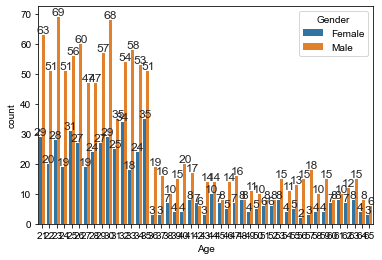

In [8]:
ax = sns.countplot(data = df, x = 'Age', hue='Gender')
sns.set(rc={'figure.figsize':(25,5)})
for i in ax.containers:
    ax.bar_label(i)

### Conclusion 1: Men between the age group of 21 to 35 drink the most

<AxesSubplot:xlabel='Age', ylabel='Prices'>

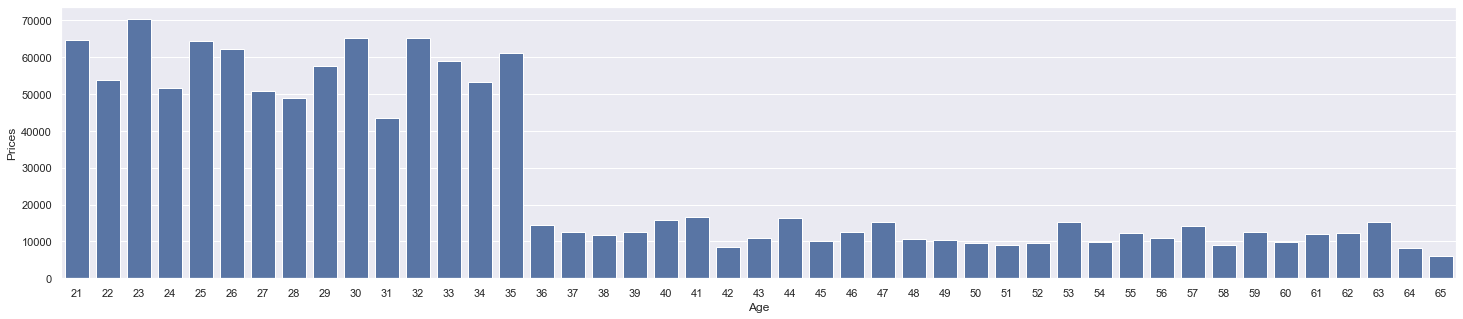

In [9]:
purchases_age = df.groupby(['Age'], as_index=False)['Prices'].sum().sort_values(by = 'Prices', ascending=False)

sns.barplot(x='Age', y='Prices', data = purchases_age)

### Conclusion 2: Most of the buyers are also between the age of 21 to 35

# Brand Popularity by age group

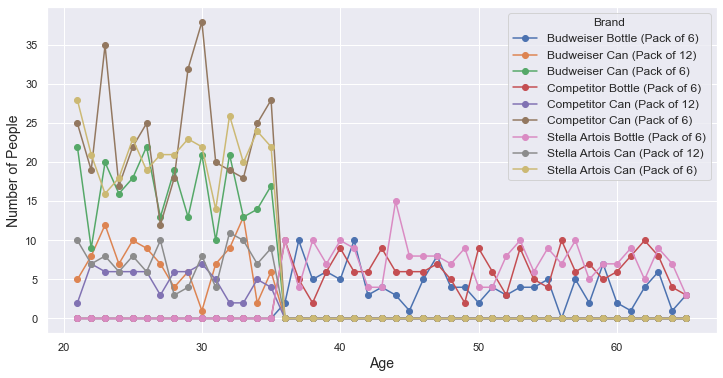

In [10]:
# Group data by brand and age
brand_age_dist = df.groupby(['Choice of Beer', 'Age']).size().unstack(fill_value=0)

# Plot brand popularity by age group
plt.figure(figsize=(12, 6))
for brand in brand_age_dist.index:
    plt.plot(brand_age_dist.columns, brand_age_dist.loc[brand], label=brand, marker='o')

plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.legend(title='Brand', fontsize=12)
plt.grid(True)
plt.show()

### Conclusion 3: Here we can conclude that cans are popular among the younger customers between 21-35 while bottles are popular among the older customers 

# Brand popularity by region

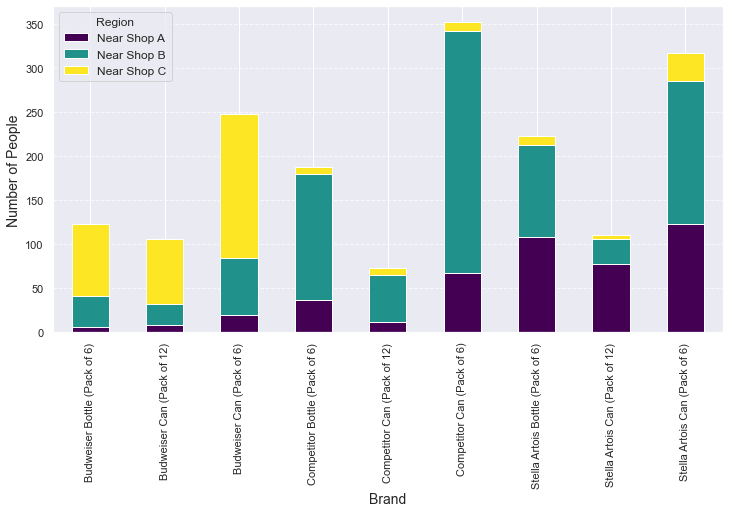

In [11]:
# Group data by brand and region
brand_region_dist = df.groupby(['Choice of Beer', 'Location']).size().unstack(fill_value=0)

# Plot brand popularity by region
brand_region_dist.plot(kind='bar', figsize=(12, 6), colormap='viridis', stacked=True)

plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.legend(title='Region', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Conclusion 4: Customers of stores A and B prefer premium brand like Stella Artois while customers of store C prefer mid-range options like Budweiser

# Solution: Replacing competitor's bottle of 6 from store A and B giving revenue increase per unit time while offering a mid-range option at store C to capture and untapped market  

## Calculating revenue projection (We will introduce only bottles of 6 in all 3 stores)

In [12]:
prices = {
    "Budweiser Can (Pack of 6)": 600,
    "Budweiser Bottle (Pack of 6)": 660,
    "Budweiser Can (Pack of 12)": 1100,
    "Stella Artois Can (Pack of 6)": 660,
    "Stella Artois Bottle (Pack of 6)": 720,
    "Stella Artois Can (Pack of 12)": 1200,
    "Competitor Can (Pack of 6)": 540,
    "Competitor Bottle (Pack of 6)": 600,
    "Competitor Can (Pack of 12)": 1000
}
df['Price'] = df['Choice of Beer'].map(prices)

# Calculate revenue per entry
df['Revenue'] = df['Prices']

# Group by store (Location) and product (Choice of Beer) to calculate total revenue
store_revenue = df.groupby(['Location', 'Choice of Beer'])['Revenue'].sum().unstack(fill_value=0)

new_product_price = {
    "Near Shop A":700, # Price of bottle of 6 in Store A
    "Near Shop B":700, # Price of bottle of 6 in Store B
    "Near Shop C":650  # Price of bottle of 6 in Store C 
}  # Example price for the new lager


new_product_sales = {
    "Near Shop A": 37,
    "Near Shop B": 143,  # Replaced competitor's product with new products in store A and B
    "Near Shop C": 75   # A sample of product introduced at store C
}
new_product_revenue = {location: new_product_sales[location] * new_product_price[location] for location in new_product_sales}

competitor_products = [
    "Competitor Can (Pack of 6)", 
    "Competitor Bottle (Pack of 6)", 
    "Competitor Can (Pack of 12)"
]
competitor_revenue = store_revenue[competitor_products].sum().sum()

ABinBev_products = [
    "Budweiser Can (Pack of 6)",
    "Budweiser Bottle (Pack of 6)",
    "Budweiser Can (Pack of 12)",
    "Stella Artois Can (Pack of 6)",
    "Stella Artois Bottle (Pack of 6)",
    "Stella Artois Can (Pack of 12)"
]
original_ABinBev_revenue = store_revenue[ABinBev_products].sum().sum()

# Calculate total revenue including the new product
total_company_revenue_with_new_product = original_ABinBev_revenue.sum().sum() + sum(new_product_revenue.values())

# Display the projected revenue growth
original_revenue = store_revenue.sum().sum()
projected_growth = ((total_company_revenue_with_new_product - original_ABinBev_revenue) / original_ABinBev_revenue) * 100

print(f"Original Total Revenue: {original_revenue}")
print(f"Original Total Revenue by company products: {original_ABinBev_revenue}")
print(f"New Product Revenue by Store: {new_product_revenue}")
print(f"Total company Revenue with New Product: {total_company_revenue_with_new_product}")
print(f"Projected Revenue Growth: {projected_growth:.2f}%")

# Save the new product revenue table
new_product_revenue_df = pd.DataFrame(list(new_product_revenue.items()), columns=['Location', 'Revenue'])
new_product_revenue_df.to_csv("New_Product_Revenue.csv", index=False)


Original Total Revenue: 1226640
Original Total Revenue by company products: 850220
New Product Revenue by Store: {'Near Shop A': 25900, 'Near Shop B': 100100, 'Near Shop C': 48750}
Total company Revenue with New Product: 1024970
Projected Revenue Growth: 20.55%


## Conclusion: A projected ~20% projected revenue growth